<a href="https://colab.research.google.com/github/Sshubam/Liver-disease-Stage-prediction-SDS-BIT-MESRA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data description

 

1) ID: Unique Identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time.

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of the drug. D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: the presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: the presence of spiders N (No) or Y (Yes)

10) Edema: the presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [ ]:
import pandas as pd
train_df = pd.read_csv('train_dataset.csv')
train_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

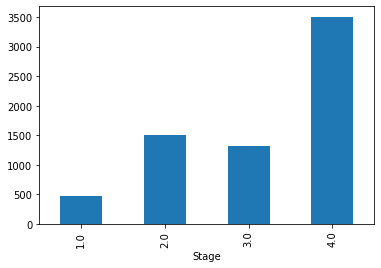

In [ ]:
train_df.groupby(['Stage']).size().plot(kind = "bar")

In [ ]:
xtrain = train_df.loc[train_df['SGOT'].notnull(), ['ID',	'N_Days',	'Status',	'Drug',	'Age',	'Sex',	'Ascites',	'Hepatomegaly',	'Spiders',	'Edema',	'Bilirubin',	'Cholesterol',	'Albumin',	'Copper',	'Alk_Phos',	'SGOT',	'Tryglicerides',	'Platelets',	'Prothrombin'	]]
xtrain

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4
5,2306,1255,C,Placebo,14353,F,Y,N,N,N,9.9,NaN,3.57,4.0,462.6,103.40,126.0,276.0,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,9238,41,D,D-penicillamine,19969,F,N,NaN,N,Y,5.9,442.0,3.15,NaN,1966.0,103.10,117.0,98.0,10.1
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6


In [ ]:
train_df_notnull = train_df.dropna()
train_df_notnull

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
32,6708,2098,C,Placebo,10562,F,Y,Y,N,N,0.3,326.0,3.07,48.0,2156.7,55.67,114.0,563.0,11.8,4.0
97,3662,3177,C,Placebo,28650,M,N,N,N,N,0.3,172.0,2.71,67.0,1325.8,101.56,96.0,413.0,11.9,4.0
275,4245,41,C,D-penicillamine,21161,M,N,N,Y,N,1.8,330.0,3.07,10.0,1539.6,117.80,111.0,62.0,12.8,4.0
323,2890,41,D,Placebo,19724,M,N,Y,N,N,0.4,347.0,3.12,71.0,289.0,109.69,97.0,197.0,12.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,4206,233,C,Placebo,17411,F,Y,Y,N,N,0.3,388.0,3.24,53.0,289.0,65.23,201.0,239.0,11.8,2.0
6438,9336,2031,C,Placebo,28650,F,N,N,N,N,0.3,240.0,2.45,61.0,13862.4,79.54,65.0,563.0,12.1,3.0
6448,6734,536,C,Placebo,17457,F,N,N,N,N,2.0,353.0,2.89,139.0,2352.2,139.48,180.0,308.0,10.8,2.0
6471,1873,941,C,D-penicillamine,22545,F,N,Y,Y,N,0.4,301.0,2.70,90.0,1699.4,102.20,120.0,102.0,11.7,4.0


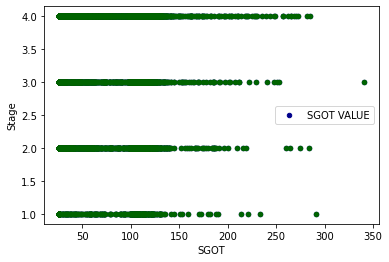

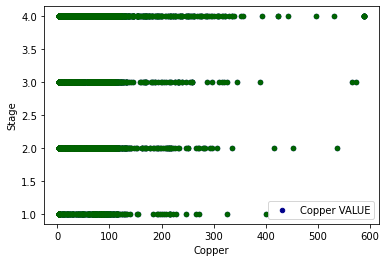

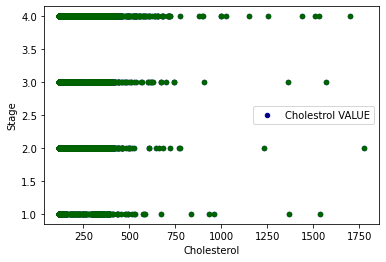

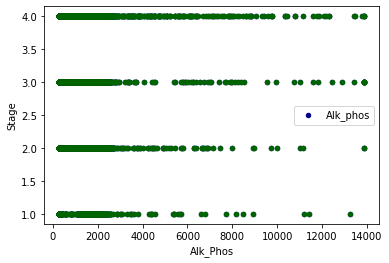

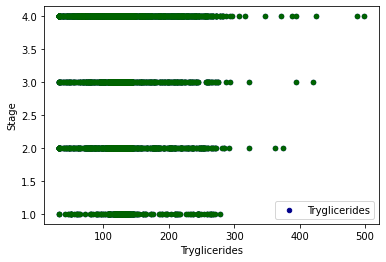

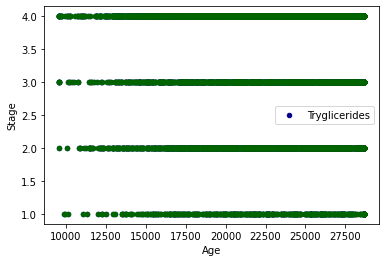

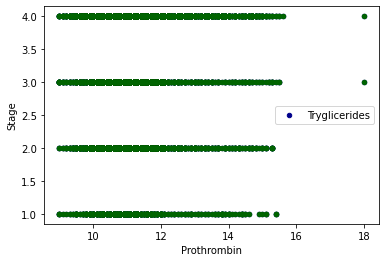

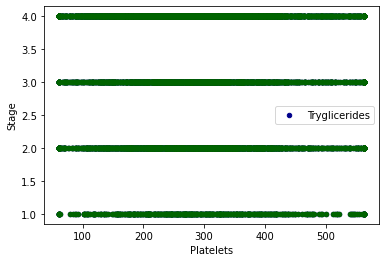

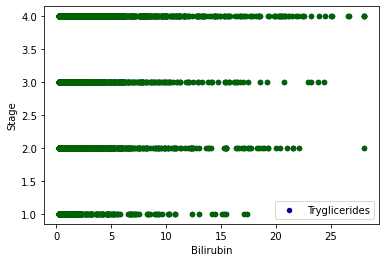

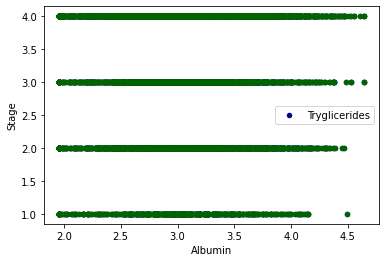

In [ ]:
import matplotlib.pyplot as plt
df = train_df

ax1 = df.plot.scatter(x="SGOT", y="Stage", color="DarkBlue", label="SGOT VALUE")
df.plot.scatter(x="SGOT", y="Stage", color="DarkGreen", ax=ax1);

ax2 = df.plot.scatter(x="Copper", y="Stage", color="DarkBlue", label="Copper VALUE")
df.plot.scatter(x="Copper", y="Stage", color="DarkGreen", ax=ax2);

ax3 = df.plot.scatter(x="Cholesterol", y="Stage", color="DarkBlue", label="Cholestrol VALUE")
df.plot.scatter(x="Cholesterol", y="Stage", color="DarkGreen", ax=ax3);

ax4 = df.plot.scatter(x="Alk_Phos", y="Stage", color="DarkBlue", label="Alk_phos")
df.plot.scatter(x="Alk_Phos", y="Stage", color="DarkGreen", ax=ax4); 

ax5 = df.plot.scatter(x="Tryglicerides", y="Stage", color="DarkBlue", label="Tryglicerides")
df.plot.scatter(x="Tryglicerides", y="Stage", color="DarkGreen", ax=ax5);

ax6 = df.plot.scatter(x="Age", y="Stage", color="DarkBlue", label="Tryglicerides")
df.plot.scatter(x="Age", y="Stage", color="DarkGreen", ax=ax6); 

ax5 = df.plot.scatter(x="Prothrombin", y="Stage", color="DarkBlue", label="Tryglicerides")
df.plot.scatter(x="Prothrombin", y="Stage", color="DarkGreen", ax=ax5); 

ax6 = df.plot.scatter(x="Platelets", y="Stage", color="DarkBlue", label="Tryglicerides")
df.plot.scatter(x="Platelets", y="Stage", color="DarkGreen", ax=ax6);  

ax6 = df.plot.scatter(x="Bilirubin", y="Stage", color="DarkBlue", label="Tryglicerides")
df.plot.scatter(x="Bilirubin", y="Stage", color="DarkGreen", ax=ax6);  

ax6 = df.plot.scatter(x="Albumin", y="Stage", color="DarkBlue", label="Tryglicerides")
df.plot.scatter(x="Albumin", y="Stage", color="DarkGreen", ax=ax6);  

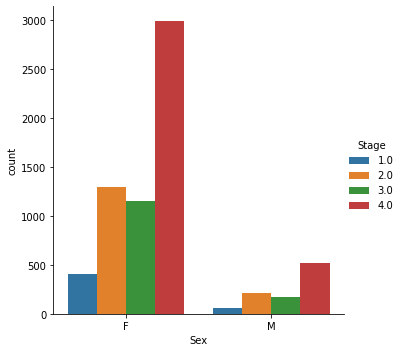

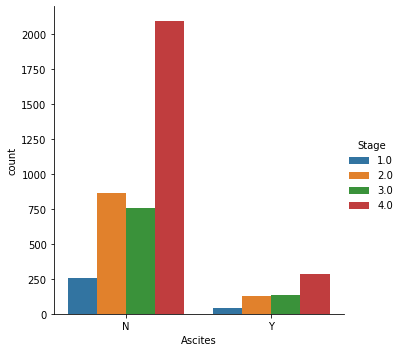

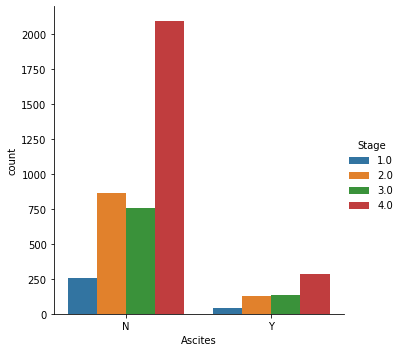

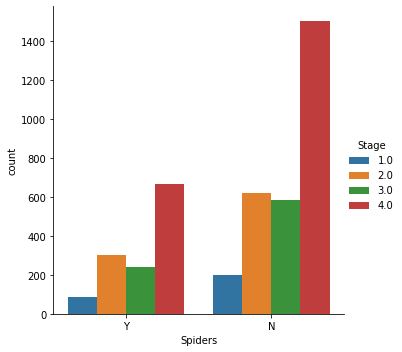

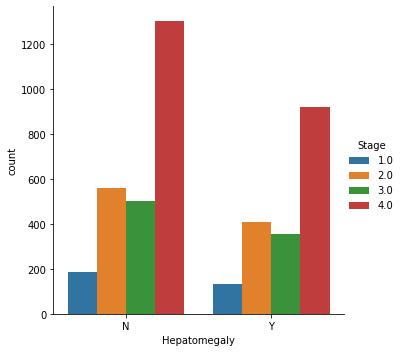

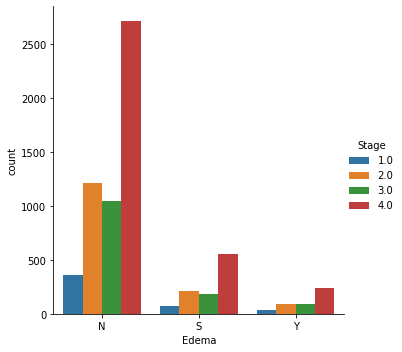

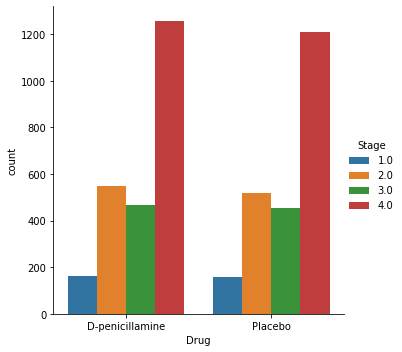

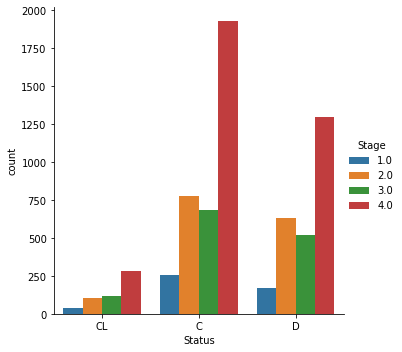

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x ="Sex", hue ="Stage",kind ="count", data = train_df)
sns.catplot(x ="Ascites", hue ="Stage",kind ="count", data = train_df)
sns.catplot(x ="Ascites", hue ="Stage",kind ="count", data = train_df)
sns.catplot(x ="Spiders", hue ="Stage",kind ="count", data = train_df) 
sns.catplot(x ="Hepatomegaly", hue ="Stage",kind ="count", data = train_df)
sns.catplot(x ="Edema", hue ="Stage",kind ="count", data = train_df)
sns.catplot(x ="Drug", hue ="Stage",kind ="count", data = train_df)
sns.catplot(x ="Status", hue ="Stage",kind ="count", data = train_df)

In [ ]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [ ]:
# Important Features: Ascites Edema Spiders Sex SGOT Alk_Phos Copper Status Bilirubin
# Least Important : N_Days Drug Age Prothrombin Albumin Cholesterol Platelets

In [ ]:
imp_df = df.drop(columns=['N_Days', 'Drug', 'Age', 'Prothrombin', 'Albumin', 'Cholesterol'])
imp_df

,ID,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Stage
0,7135,CL,F,N,N,Y,N,0.3,84.0,1500.8,99.43,109.0,293.0,4.0
1,7326,C,F,NaN,N,NaN,N,0.3,NaN,1835.4,26.35,131.0,308.0,1.0
2,7254,D,F,N,N,NaN,N,0.3,4.0,NaN,NaN,116.0,194.0,3.0
3,3135,C,F,NaN,Y,Y,N,0.3,49.0,NaN,26.35,NaN,NaN,4.0
4,2483,CL,F,NaN,NaN,NaN,N,0.5,91.0,NaN,104.56,NaN,306.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,C,M,NaN,N,NaN,N,0.9,NaN,3444.4,131.59,130.0,314.0,1.0
6796,4446,C,F,Y,N,N,N,0.3,43.0,NaN,NaN,238.0,399.0,4.0
6797,4082,C,F,N,Y,NaN,N,0.3,NaN,NaN,26.35,123.0,103.0,1.0
6798,2248,CL,F,N,NaN,Y,N,0.3,12.0,289.0,72.95,134.0,354.0,2.0


In [ ]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   Status         6800 non-null   object 
 2   Sex            6800 non-null   object 
 3   Ascites        4554 non-null   object 
 4   Hepatomegaly   4373 non-null   object 
 5   Spiders        4210 non-null   object 
 6   Edema          6800 non-null   object 
 7   Bilirubin      6800 non-null   float64
 8   Copper         4644 non-null   float64
 9   Alk_Phos       4302 non-null   float64
 10  SGOT           4698 non-null   float64
 11  Tryglicerides  3988 non-null   float64
 12  Platelets      6462 non-null   float64
 13  Stage          6800 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 743.9+ KB


In [ ]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [ ]:
df.interpolate(method ='quadratic', limit_direction ='forward')

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.000000,2.96,84.000000,1500.800000,99.430000,109.000000,293.000000,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,326.529134,2.96,14.194495,1835.400000,26.350000,131.000000,308.000000,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.000000,2.64,4.000000,1506.302159,-2.774251,116.000000,194.000000,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.000000,2.02,49.000000,513.506477,26.350000,98.311996,236.435066,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.000000,3.11,91.000000,-161.542443,104.560000,89.651547,306.000000,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.000000,2.43,169.631476,3444.400000,131.590000,130.000000,314.000000,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,278.137285,2.99,43.000000,3861.813736,74.470933,238.000000,399.000000,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.000000,2.79,-9.543825,2810.013736,26.350000,123.000000,103.000000,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.000000,289.000000,72.950000,134.000000,354.000000,10.6,2.0


In [ ]:
df.interpolate(method ='quadratic', limit_direction ='forward').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    6798 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         6799 non-null   float64
 14  Alk_Phos       6799 non-null   float64
 15  SGOT           6800 non-null   float64
 16  Tryglicerides  6800 non-null   float64
 17  Platelets      6800 non-null   float64
 18  Prothrom

In [ ]:
data_features=imp_df.drop(['ID', 'Stage'],axis=1)
data_num_features = imp_df.drop(['ID', 'Stage', 'Copper', 'Edema', 'Spiders', 'Hepatomegaly', 'Ascites', 'Sex', 'Status'],axis=1)
data_num_features.head()

,Bilirubin,Alk_Phos,SGOT,Tryglicerides,Platelets
0,0.3,1500.8,99.43,109.0,293.0
1,0.3,1835.4,26.35,131.0,308.0
2,0.3,NaN,NaN,116.0,194.0
3,0.3,NaN,26.35,NaN,NaN
4,0.5,NaN,104.56,NaN,306.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets
0,CL,F,N,N,Y,N,-0.468071,84.0,-0.186702,0.457654,-0.525696,-0.002659
1,C,F,NaN,N,NaN,N,-0.468071,NaN,0.020050,-1.225084,-0.060438,0.127621
2,D,F,N,N,NaN,N,-0.468071,4.0,NaN,NaN,-0.377659,-0.862502
3,C,F,NaN,Y,Y,N,-0.468071,49.0,NaN,-1.225084,NaN,NaN
4,CL,F,NaN,NaN,NaN,N,-0.405917,91.0,NaN,0.575778,NaN,0.110250


In [ ]:
data_encoded=pd.get_dummies(data_features_scaled)
data_encoded.head()

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.468071,84.0,-0.186702,0.457654,-0.525696,-0.002659,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1,-0.468071,NaN,0.020050,-1.225084,-0.060438,0.127621,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.468071,4.0,NaN,NaN,-0.377659,-0.862502,0,0,1,1,0,1,0,1,0,0,0,1,0,0
3,-0.468071,49.0,NaN,-1.225084,NaN,NaN,1,0,0,1,0,0,0,0,1,0,1,1,0,0
4,-0.405917,91.0,NaN,0.575778,NaN,0.110250,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data_encoded
y = df['Stage'] 
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((4760, 20), (2040, 20))

In [ ]:
X_train.dtypes

Bilirubin         float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Status_C            uint8
Status_CL           uint8
Status_D            uint8
Sex_F               uint8
Sex_M               uint8
Ascites_N           uint8
Ascites_Y           uint8
Hepatomegaly_N      uint8
Hepatomegaly_Y      uint8
Spiders_N           uint8
Spiders_Y           uint8
Edema_N             uint8
Edema_S             uint8
Edema_Y             uint8
dtype: object

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_test[numerical].isnull().sum()

Bilirubin           0
Copper            652
Alk_Phos          767
SGOT              629
Tryglicerides     809
Platelets         113
Status_C            0
Status_CL           0
Status_D            0
Sex_F               0
Sex_M               0
Ascites_N           0
Ascites_Y           0
Hepatomegaly_N      0
Hepatomegaly_Y      0
Spiders_N           0
Spiders_Y           0
Edema_N             0
Edema_S             0
Edema_Y             0
dtype: int64

In [ ]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Copper 0.316
Alk_Phos 0.3637
SGOT 0.3095
Tryglicerides 0.4208
Platelets 0.0473


In [ ]:
data_encoded.keys

<bound method NDFrame.keys of       Bilirubin  Copper  Alk_Phos  ...  Edema_N  Edema_S  Edema_Y
0     -0.468071    84.0 -0.186702  ...        1        0        0
1     -0.468071     NaN  0.020050  ...        1        0        0
2     -0.468071     4.0       NaN  ...        1        0        0
3     -0.468071    49.0       NaN  ...        1        0        0
4     -0.405917    91.0       NaN  ...        1        0        0
...         ...     ...       ...  ...      ...      ...      ...
6795  -0.281607     NaN  1.014265  ...        1        0        0
6796  -0.468071    43.0       NaN  ...        1        0        0
6797  -0.468071     NaN       NaN  ...        1        0        0
6798  -0.468071    12.0 -0.935484  ...        1        0        0
6799   1.272263     NaN       NaN  ...        1        0        0

[6800 rows x 20 columns]>

In [ ]:
data_encoded

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.468071,84.0,-0.186702,0.457654,-0.525696,-0.002659,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1,-0.468071,NaN,0.020050,-1.225084,-0.060438,0.127621,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.468071,4.0,NaN,NaN,-0.377659,-0.862502,0,0,1,1,0,1,0,1,0,0,0,1,0,0
3,-0.468071,49.0,NaN,-1.225084,NaN,NaN,1,0,0,1,0,0,0,0,1,0,1,1,0,0
4,-0.405917,91.0,NaN,0.575778,NaN,0.110250,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,-0.281607,NaN,1.014265,1.198170,-0.081586,0.179733,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6796,-0.468071,43.0,NaN,NaN,2.202412,0.917982,1,0,0,1,0,0,1,1,0,1,0,1,0,0
6797,-0.468071,NaN,NaN,-1.225084,-0.229623,-1.652864,1,0,0,1,0,1,0,0,1,0,0,1,0,0
6798,-0.468071,12.0,-0.935484,-0.152073,0.003007,0.527144,0,1,0,1,0,1,0,0,0,0,1,1,0,0


In [ ]:
data_encoded = data_encoded.interpolate(method ='quadratic', limit_direction ='forward')
data_encoded

,Bilirubin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-0.468071,84.000000,-0.186702,0.457654,-0.525696,-0.002659,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1,-0.468071,14.194495,0.020050,-1.225084,-0.060438,0.127621,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.468071,4.000000,-0.183302,-1.895698,-0.377659,-0.862502,0,0,1,1,0,1,0,1,0,0,0,1,0,0
3,-0.468071,49.000000,-0.796759,-1.225084,-0.751728,-0.493942,1,0,0,1,0,0,0,0,1,0,1,1,0,0
4,-0.405917,91.000000,-1.213878,0.575778,-0.934880,0.110250,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,-0.281607,169.631476,1.014265,1.198170,-0.081586,0.179733,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6796,-0.468071,43.000000,1.272189,-0.117052,2.202412,0.917982,1,0,0,1,0,0,1,1,0,1,0,1,0,0
6797,-0.468071,-9.543825,0.622272,-1.225084,-0.229623,-1.652864,1,0,0,1,0,1,0,0,1,0,0,1,0,0
6798,-0.468071,12.000000,-0.935484,-0.152073,0.003007,0.527144,0,1,0,1,0,1,0,0,0,0,1,1,0,0


In [ ]:
features_numpy = data_encoded.loc[:,:].values
targets_numpy = df['Stage'].values

In [ ]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.3, random_state=0)

In [ ]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

In [ ]:
featuresTrain

In [ ]:
targetsTrain

In [ ]:
torch.set_printoptions(profile="full")